In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import *
import sklearn

In [162]:
df = pd.read_csv("Social_Network_Ads.csv").iloc[:,2:]
x = df.iloc[:,:-1].values # m x 1
y = df.iloc[:,-1].values.reshape(-1,1) # m x 1 

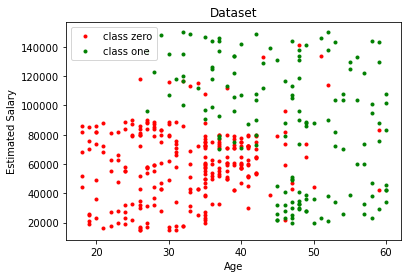

we should bulid a classifier that splits between two classes.


In [163]:
# plotting Dataset

data = df.values
data = data[data[:,2].argsort()]
plt.plot(data[:257,0],data[:257,1],'r.',label='class zero')
plt.plot(data[257:,0],data[257:,1],'g.',label='class one')
plt.title('Dataset')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
print("we should bulid a classifier that splits between two classes.")

In [164]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [165]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train) 
x_test = sc.fit_transform(x_test) 

In [173]:
def Accuracy (x, y, w , b , threshold=0.5):
    T = 0
    hyp = sigmoid(np.dot(x, w.T ) + b)
    for i in range(y.shape[0]):
        if hyp[i] >= threshold:
            T += 1
return T

In [166]:
def sigmoid(x):
    return 1/( 1 + np.exp(-x) )

In [167]:
m , n = x_train.shape
w , b = np.zeros((1,n)) , 0    # 1 x n
learning_rate , epochs = 0.01 , 20000
costArr = []
for i in range(epochs):
    hyp = sigmoid(np.dot(x_train , w.T ) + b) # m x n . n x 1 = m x 1 
    
    dw = (1/m) * np.dot((hyp-y_train).T , x_train) # 1 x m  . m x n
    db = (1/m) * np.sum(hyp - y_train)

    w -= learning_rate * dw 
    b -= learning_rate * db
    if i % 100 == 0 :
        J = (-1/m) * np.sum(y_train * np.log(hyp) + (1 - y_train) * np.log(1-hyp)) 
        costArr.append(J)



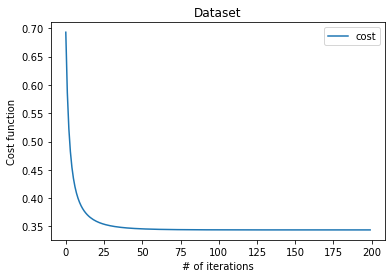

In [168]:
index = list(range(len(costArr)))
plt.plot(index,costArr,label='cost')
plt.title('Dataset')
plt.xlabel('# of iterations')
plt.ylabel('Cost function')
plt.legend()
plt.show()


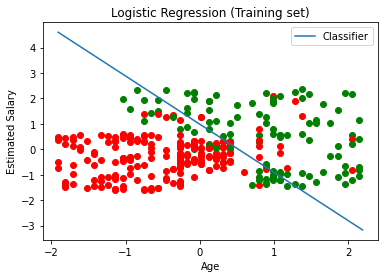

In [170]:
x=np.arange(min(x_train[:,0]),max(x_train[:,0])+0.1,step=0.1)
y=(b+w[0,0]*x)/(-w[0,1])
for i in range(x_train.shape[0]):
    if(y_train[i,0] == 0):
        plt.scatter(x_train[i,0],x_train[i,1],c='r')
    else:
        plt.scatter(x_train[i,0],x_train[i,1],c='g')
plt.plot(x,y,label='Classifier')
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()        

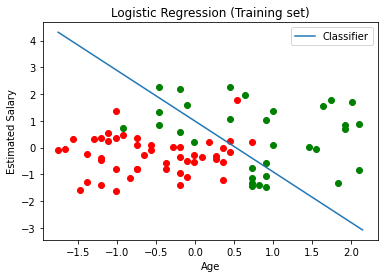

In [171]:
x=np.arange(min(x_test[:,0]),max(x_test[:,0])+0.1,step=0.1)
y=(b+w[0,0]*x)/(-w[0,1])
for i in range(x_test.shape[0]):
    if(y_test[i,0] == 0):
        plt.scatter(x_test[i,0],x_test[i,1],c='r')
    else:
        plt.scatter(x_test[i,0],x_test[i,1],c='g')
plt.plot(x,y,label='Classifier')
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()  